In [2]:
import pandas as pd #help to read data from different data sources like excel
import matplotlib.pyplot as plt #for visualization
import numpy as np
%matplotlib inline 
# this is a magic command in Jupyter Notebook that ensures that matplotlib plots appear directly inside the notebook instead of opening in a separate window.

In [3]:
df=pd.read_csv('height_weight.csv')

In [4]:
df.head()

,Height (cm),Weight (kg)
0,166.016056,54.828682
1,199.885135,73.988026
2,169.844670,55.866501
3,152.488094,44.211842
4,158.305895,46.898891


Text(0, 0.5, 'Height (cm)')

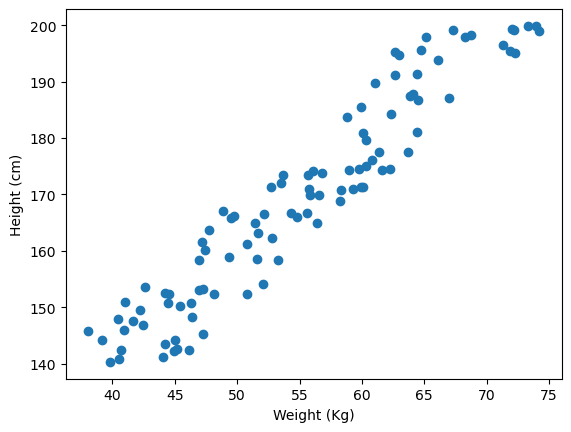

In [5]:
#scatter plot
plt.scatter(df['Weight (kg)'],df['Height (cm)'])
plt.xlabel('Weight (Kg)')
plt.ylabel('Height (cm)')

In [6]:
##Correlation
df.corr()

,Height (cm),Weight (kg)
Height (cm),1.000000,0.951752
Weight (kg),0.951752,1.000000


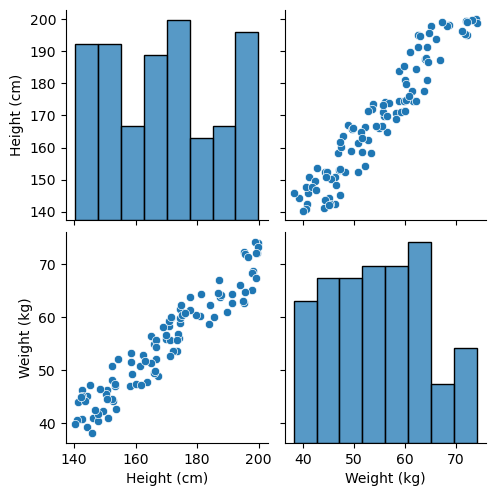

In [7]:
##Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
## independent and dependent features
x_series = df['Weight (kg)'] #will be an error
x = df[['Weight (kg)']] ##independent feature should be data frame or 2 dimensional array by adding additional brackets

y = df['Height (cm)'] #dependent feature should be in series form or 1 D array

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(75, 1)

In [12]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [14]:
x_test = scaler.transform(x_test)

In [15]:
x_test

array([[ 0.99873246],
       [ 0.06711216],
       [-0.56836264],
       [ 0.54053313],
       [ 0.95569091],
       [ 0.50521672],
       [ 0.63411928],
       [-1.29392782],
       [-0.29343314],
       [-0.01262712],
       [-1.47046287],
       [ 1.39470881],
       [ 1.02082845],
       [-0.80416531],
       [ 1.80169674],
       [-0.84208874],
       [-0.81421868],
       [-1.51749018],
       [-1.45615283],
       [ 0.08277534],
       [ 0.4532392 ],
       [-0.34673956],
       [-1.08785258],
       [ 1.29333765],
       [ 0.84028665]])

In [16]:
##Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(x_train,y_train)

LinearRegression()

In [19]:
print('Coefficient or slope:',regression.coef_)
print('Intercept:',regression.intercept_)

Coefficient or slope: [17.22300641]
Intercept: 168.2078243589734


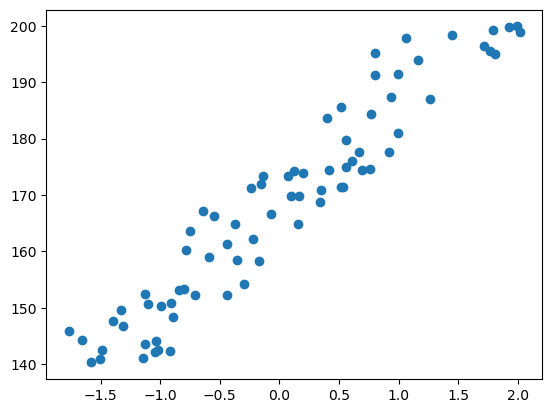

In [20]:
#plot training data plot best fit line 
plt.scatter(x_train,y_train)

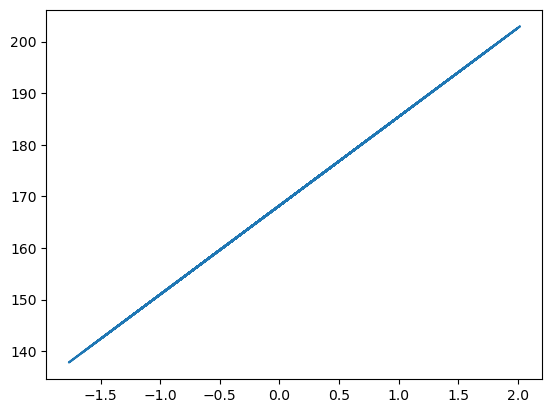

In [32]:
plt.plot(x_train,regression.predict(x_train))

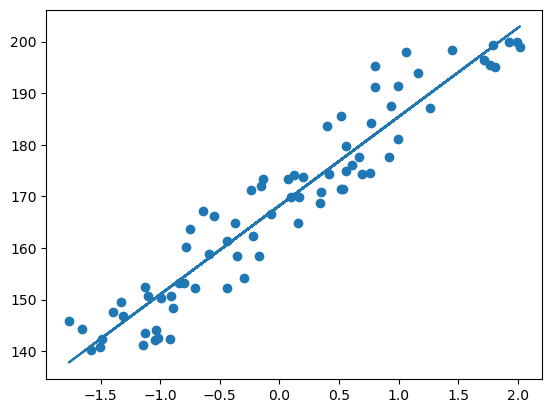

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [21]:
##prediction for test data
y_pred = regression.predict(x_test)

In [22]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

36.91420928591434
5.116971093730008
6.075706484509793


In [24]:
#R square
from sklearn.metrics import r2_score

In [25]:
score = r2_score(y_test,y_pred)
print(score)

0.8806570361728235


In [26]:
#adjusted R squared
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8754682116585984

In [27]:
#OLS Linear Regression
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train,x_train).fit()

In [29]:
prediction = model.predict(x_test)
print(prediction)

[ 17.20117554   1.15587316  -9.78891338   9.30960559  16.45987067
   8.70135079  10.92144044 -22.28532706  -5.05380082  -0.21747688
 -25.32579145  24.02107876  17.58173497 -13.85014421  31.03063451
 -14.50329979 -14.02329348 -26.13574317 -25.07932949   1.42564018
   7.80614168  -5.9718977  -18.73609202  22.27516268  14.47226236]


In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Height (cm)   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.7750
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                       0.382
Time:                        15:44:45   Log-Likelihood:                         -490.85
No. Observations:                  75   AIC:                                      983.7
Df Residuals:                      74   BIC:                                      986.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
#prediction for new data 
regression.predict(scaler.transform([[72]]))

c:\Users\33152\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([198.92513469])